## Importing libraries and configurations

In [1]:
# File management and numerical operations
import os
import numpy as np
import pandas as pd

# Sound processing and phonetics
import parselmouth

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Set the base path for the audios folder
_audio_dir_ = os.path.join(os.getcwd(), "..", "000_Audios")

def get_file(subdir, file):
    # Path to the "vocals" folder within "audios"
    file = os.path.join(_audio_dir_, subdir, file)
    return file

## Context

In this notebook, I will explore the differences in the first, second, and third formants between males and females when pronouncing each vowel.

**Note:** These samples do not necessarily represent a general description of this topic because the structure of the voice varies between individuals. Therefore, I have complemented this notebook with external information.

## Struct per Vowels

In this stage, I will load the audio files corresponding to each vowel individually. For each vowel, the following steps will be performed:

1. **Waveform Visualization**: The waveform of the audio file will be plotted to observe the general characteristics of the sound signal for both male and female speakers.
2. **Formant Calculation**: The first three formants (F1, F2, and F3) will be computed for each audio file. These formants represent key frequency components that help characterize the vowel sounds.
3. **Mean Formant Comparison**: The mean values of each formant (F1, F2, and F3) will be calculated for both male and female speakers. These means will be compared to analyze the differences in formant frequencies between genders for each vowel.

By structuring the analysis in this way, we aim to gain insights into how the formants vary between males and females for each vowel sound. This approach provides a systematic way to explore potential patterns and differences in the frequency characteristics of vowel articulation.

### Vowel 'a'

The first step involves loading the audio files using the `Sound` function from the `parselmouth` library.

In [2]:
# Load the audio file
vowel_a_men = parselmouth.Sound(get_file('Vocals', 'speaker1_a.wav'))
vowel_a_women = parselmouth.Sound(get_file('Vocals', 'speaker3_a.wav'))

Next, I visualize the waveform for both audio files. At this stage, I cannot describe any specific behavior or make inferences based on the visualization.

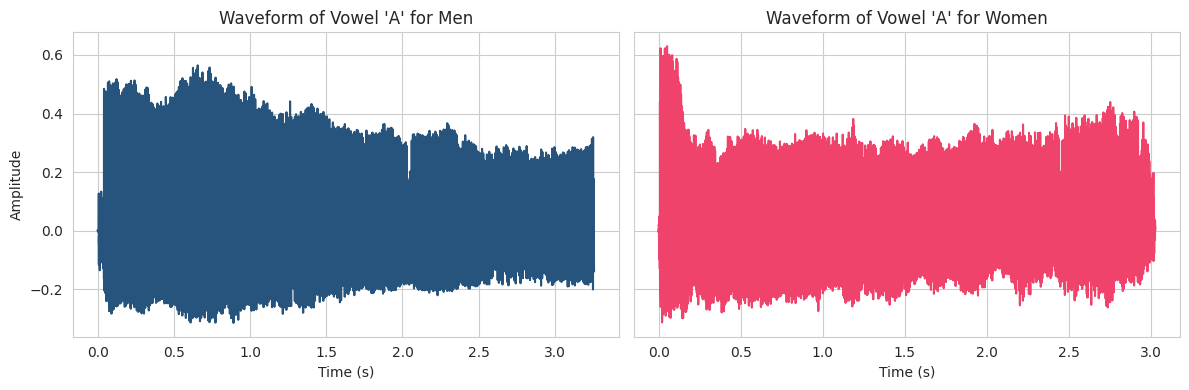

In [3]:
# Extract waveform data and plot it using seaborn
time_a_men = vowel_a_men.xs()
amplitude_a_men = vowel_a_men.values[0]

time_a_women = vowel_a_women.xs()
amplitude_a_women = vowel_a_women.values[0]

# Create a figure with two subplots in horizontal layout (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True, sharex=False)

# Plot waveform for Men on the first axis
sns.lineplot(x=time_a_men, y=amplitude_a_men, ax=ax1, color="#27547D")
ax1.set_title("Waveform of Vowel 'A' for Men")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude")

# Plot waveform for Women on the second axis
sns.lineplot(x=time_a_women, y=amplitude_a_women, ax=ax2, color="#EF436B")
ax2.set_title("Waveform of Vowel 'A' for Women")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Amplitude")

# Adjust layout
plt.tight_layout()
plt.show()

Subsequently, I extract the formant information from the waveform using the Burn algorithm.

In [4]:
# Calculate formants using the Burg algorithm
formants_men = vowel_a_men.to_formant_burg()
formants_women = vowel_a_women.to_formant_burg()

Next, I compute the first, second, and third formants for each speaker's audio file.

In [5]:
# Extract time and formants F1, F2, F3 for men
times_a_men = np.linspace(formants_men.xmin, formants_men.xmax, formants_men.nx)
f1_a_men = [formants_men.get_value_at_time(1, t) for t in times_a_men]
f2_a_men = [formants_men.get_value_at_time(2, t) for t in times_a_men]
f3_a_men = [formants_men.get_value_at_time(3, t) for t in times_a_men]

# Extract time and formants F1, F2, F3 for women
times_a_women = np.linspace(formants_women.xmin, formants_women.xmax, formants_women.nx)
f1_a_women = [formants_women.get_value_at_time(1, t) for t in times_a_women]
f2_a_women = [formants_women.get_value_at_time(2, t) for t in times_a_women]
f3_a_women = [formants_women.get_value_at_time(3, t) for t in times_a_women]

Before proceeding, I compute the mean of each formant for both speakers to compare their respective mean frequencies by gender.

In [6]:
# Extract time and formants F1, F2, F3 for men
f1_a_men_avg = np.nanmean(f1_a_men)
f2_a_men_avg = np.nanmean(f2_a_men)
f3_a_men_avg = np.nanmean(f3_a_men)

# Extract time and formants F1, F2, F3 for women
f1_a_women_avg = np.nanmean(f1_a_women)
f2_a_women_avg = np.nanmean(f2_a_women)
f3_a_women_avg = np.nanmean(f3_a_women)

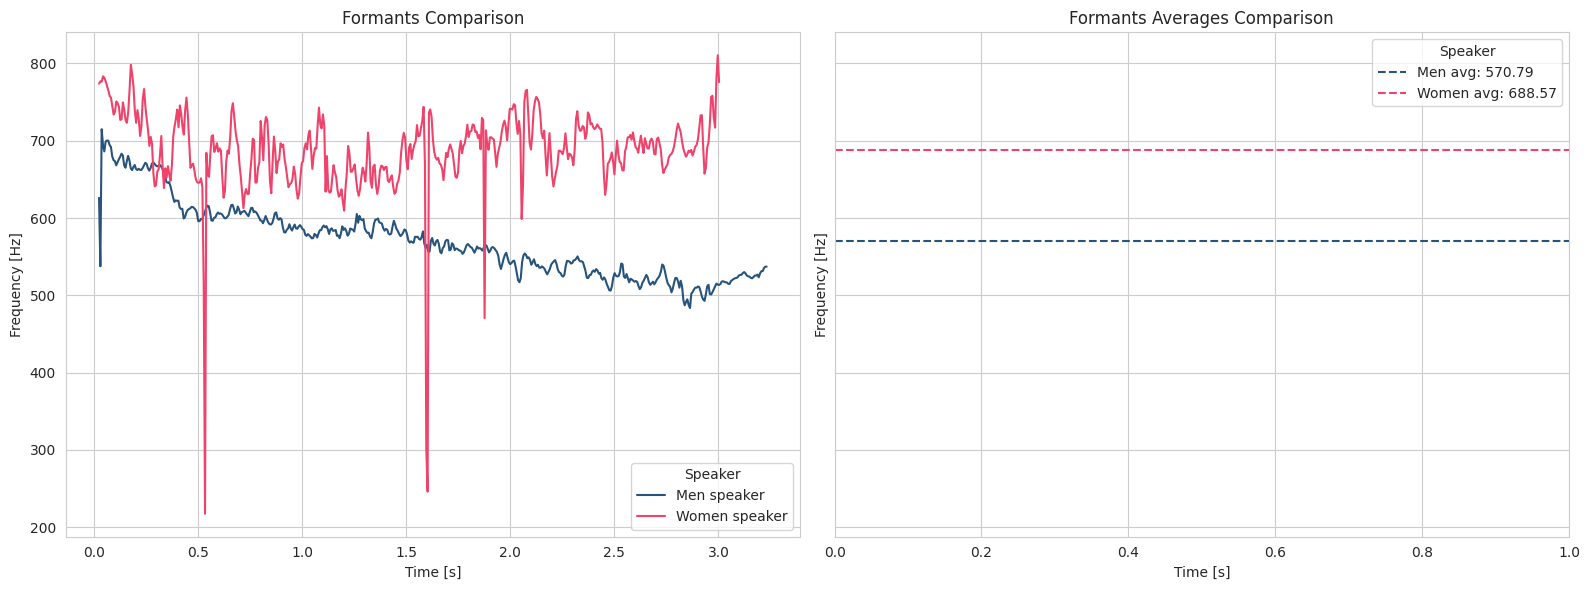

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Adding the time series
sns.lineplot(ax=axes[0], x=times_a_men, y=f1_a_men, label="Men speaker", color='#27547D')
sns.lineplot(ax=axes[0], x=times_a_women, y=f1_a_women, label="Women speaker", color='#EF436B')
axes[0].set_title("Formants Comparison")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Frequency [Hz]")
axes[0].grid(True)
axes[0].legend(title="Speaker")

# Adding the average values
axes[1].axhline(f1_a_men_avg, color='#27547D', linestyle='--', label=f'Men avg: {f1_a_men_avg:.2f}')
axes[1].axhline(f1_a_women_avg, color='#EF436B', linestyle='--', label=f'Women avg: {f1_a_women_avg:.2f}')
axes[1].set_title("Formants Averages Comparison")
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Frequency [Hz]")
axes[1].grid(True)
axes[1].legend(title="Speaker")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

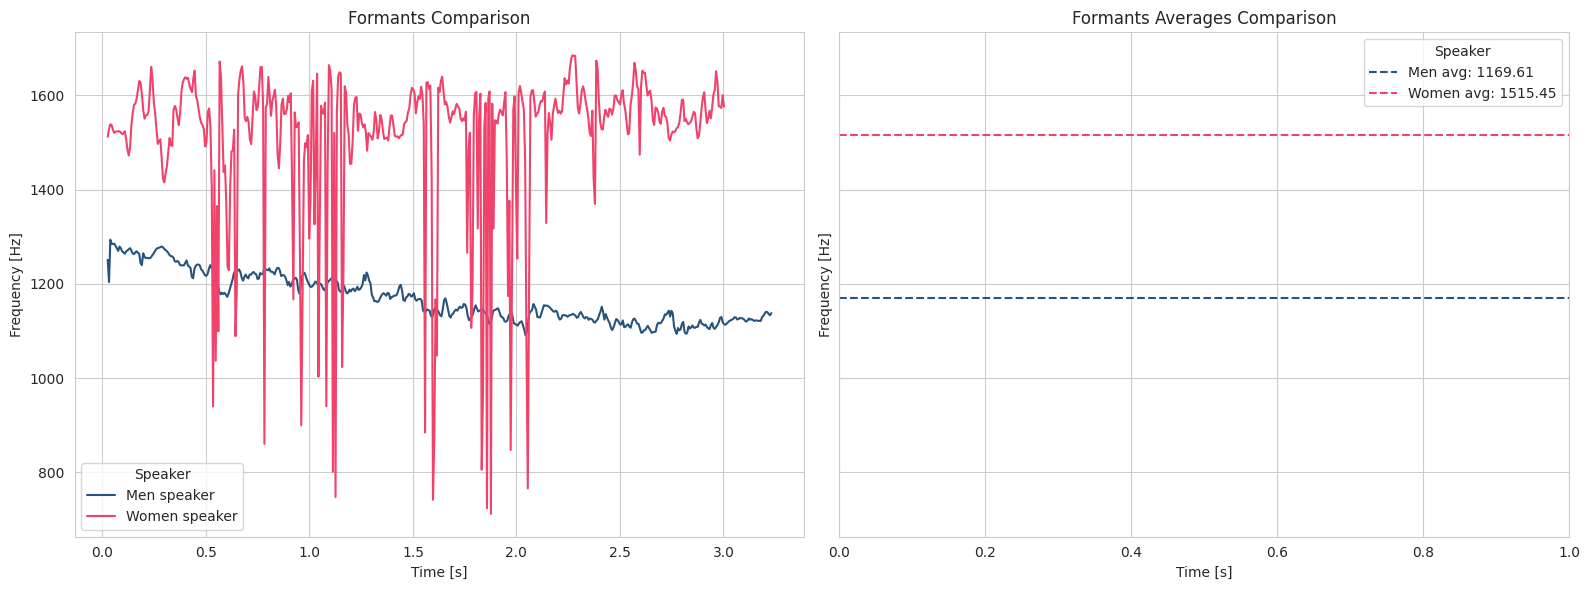

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Adding the time series
sns.lineplot(ax=axes[0], x=times_a_men, y=f2_a_men, label="Men speaker", color='#27547D')
sns.lineplot(ax=axes[0], x=times_a_women, y=f2_a_women, label="Women speaker", color='#EF436B')
axes[0].set_title("Formants Comparison")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Frequency [Hz]")
axes[0].grid(True)
axes[0].legend(title="Speaker")

# Adding the average values
axes[1].axhline(f2_a_men_avg, color='#27547D', linestyle='--', label=f'Men avg: {f2_a_men_avg:.2f}')
axes[1].axhline(f2_a_women_avg, color='#EF436B', linestyle='--', label=f'Women avg: {f2_a_women_avg:.2f}')
axes[1].set_title("Formants Averages Comparison")
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Frequency [Hz]")
axes[1].grid(True)
axes[1].legend(title="Speaker")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

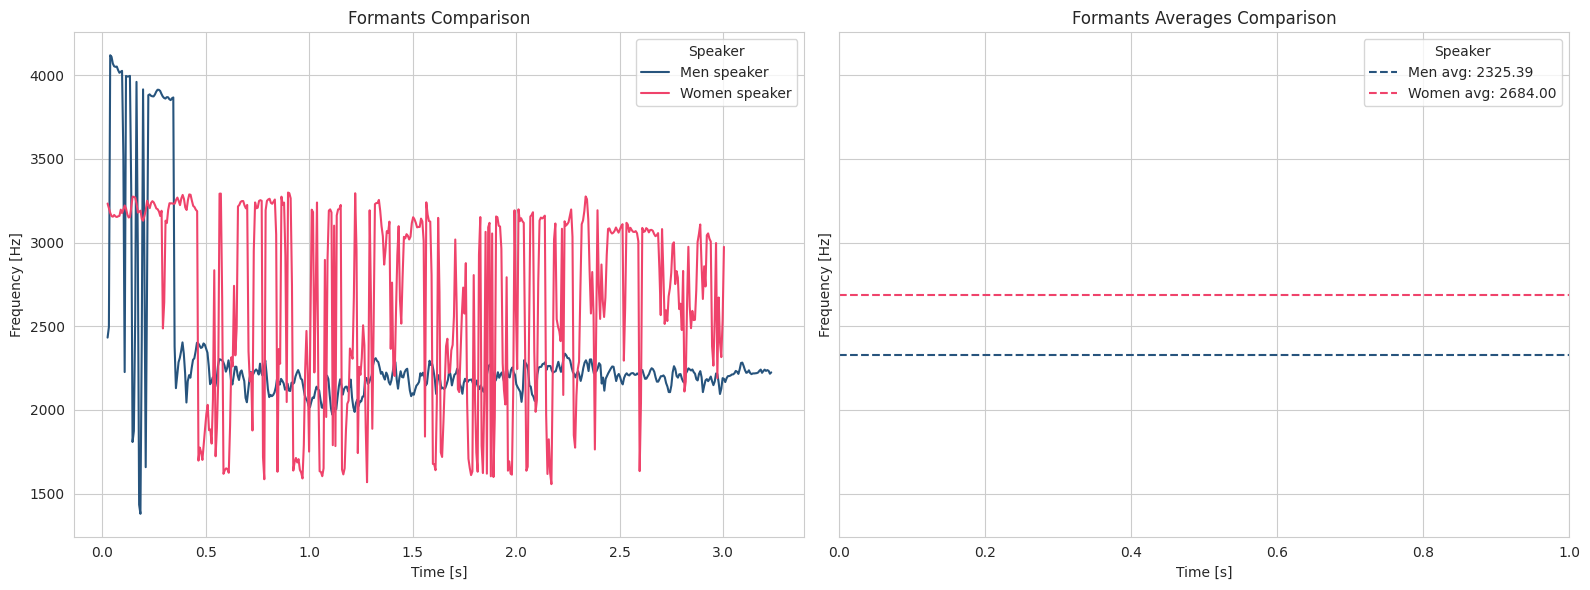

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Adding the time series
sns.lineplot(ax=axes[0], x=times_a_men, y=f3_a_men, label="Men speaker", color='#27547D')
sns.lineplot(ax=axes[0], x=times_a_women, y=f3_a_women, label="Women speaker", color='#EF436B')
axes[0].set_title("Formants Comparison")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Frequency [Hz]")
axes[0].grid(True)
axes[0].legend(title="Speaker")

# Adding the average values
axes[1].axhline(f3_a_men_avg, color='#27547D', linestyle='--', label=f'Men avg: {f3_a_men_avg:.2f}')
axes[1].axhline(f3_a_women_avg, color='#EF436B', linestyle='--', label=f'Women avg: {f3_a_women_avg:.2f}')
axes[1].set_title("Formants Averages Comparison")
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Frequency [Hz]")
axes[1].grid(True)
axes[1].legend(title="Speaker")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Vowel 'e'

In [10]:
# Load the audio file
vowel_e_men = parselmouth.Sound(get_file('Vocals', 'speaker1_e.wav'))
vowel_e_women = parselmouth.Sound(get_file('Vocals', 'speaker3_e.wav'))

Next, I visualize the waveform for both audio files. At this stage, I cannot describe any specific behavior or make inferences based on the visualization.

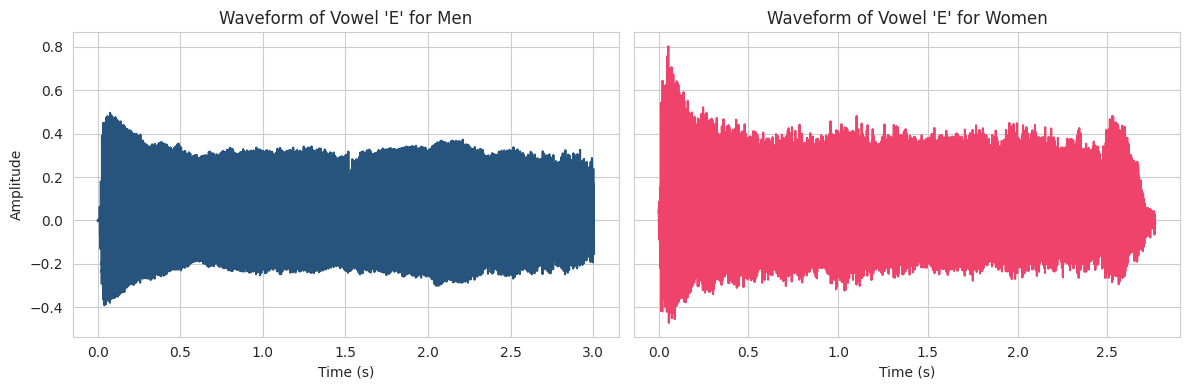

In [11]:
# Extract waveform data and plot it using seaborn
time_e_men = vowel_e_men.xs()
amplitude_e_men = vowel_e_men.values[0]

time_e_women = vowel_e_women.xs()
amplitude_e_women = vowel_e_women.values[0]

# Create a figure with two subplots in horizontal layout (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True, sharex=False)

# Plot waveform for Men on the first axis
sns.lineplot(x=time_e_men, y=amplitude_e_men, ax=ax1, color="#27547D")
ax1.set_title("Waveform of Vowel 'E' for Men")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude")

# Plot waveform for Women on the second axis
sns.lineplot(x=time_e_women, y=amplitude_e_women, ax=ax2, color="#EF436B")
ax2.set_title("Waveform of Vowel 'E' for Women")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Amplitude")

# Adjust layout
plt.tight_layout()
plt.show()

Subsequently, I extract the formant information from the waveform using the Burn algorithm.

In [12]:
# Calculate formants using the Burg algorithm
formants_men = vowel_e_men.to_formant_burg()
formants_women = vowel_e_women.to_formant_burg()

Next, I compute the first, second, and third formants for each speaker's audio file.

In [13]:
# Extract time and formants F1, F2, F3 for men
times_e_men = np.linspace(formants_men.xmin, formants_men.xmax, formants_men.nx)
f1_e_men = [formants_men.get_value_at_time(1, t) for t in times_e_men]
f2_e_men = [formants_men.get_value_at_time(2, t) for t in times_e_men]
f3_e_men = [formants_men.get_value_at_time(3, t) for t in times_e_men]

# Extract time and formants F1, F2, F3 for women
times_e_women = np.linspace(formants_women.xmin, formants_women.xmax, formants_women.nx)
f1_e_women = [formants_women.get_value_at_time(1, t) for t in times_e_women]
f2_e_women = [formants_women.get_value_at_time(2, t) for t in times_e_women]
f3_e_women = [formants_women.get_value_at_time(3, t) for t in times_e_women]

Before proceeding, I compute the mean of each formant for both speakers to compare their respective mean frequencies by gender.

In [14]:
# Extract time and formants F1, F2, F3 for men
f1_e_men_avg = np.nanmean(f1_e_men)
f2_e_men_avg = np.nanmean(f2_e_men)
f3_e_men_avg = np.nanmean(f3_e_men)

# Extract time and formants F1, F2, F3 for women
f1_e_women_avg = np.nanmean(f1_e_women)
f2_e_women_avg = np.nanmean(f2_e_women)
f3_e_women_avg = np.nanmean(f3_e_women)

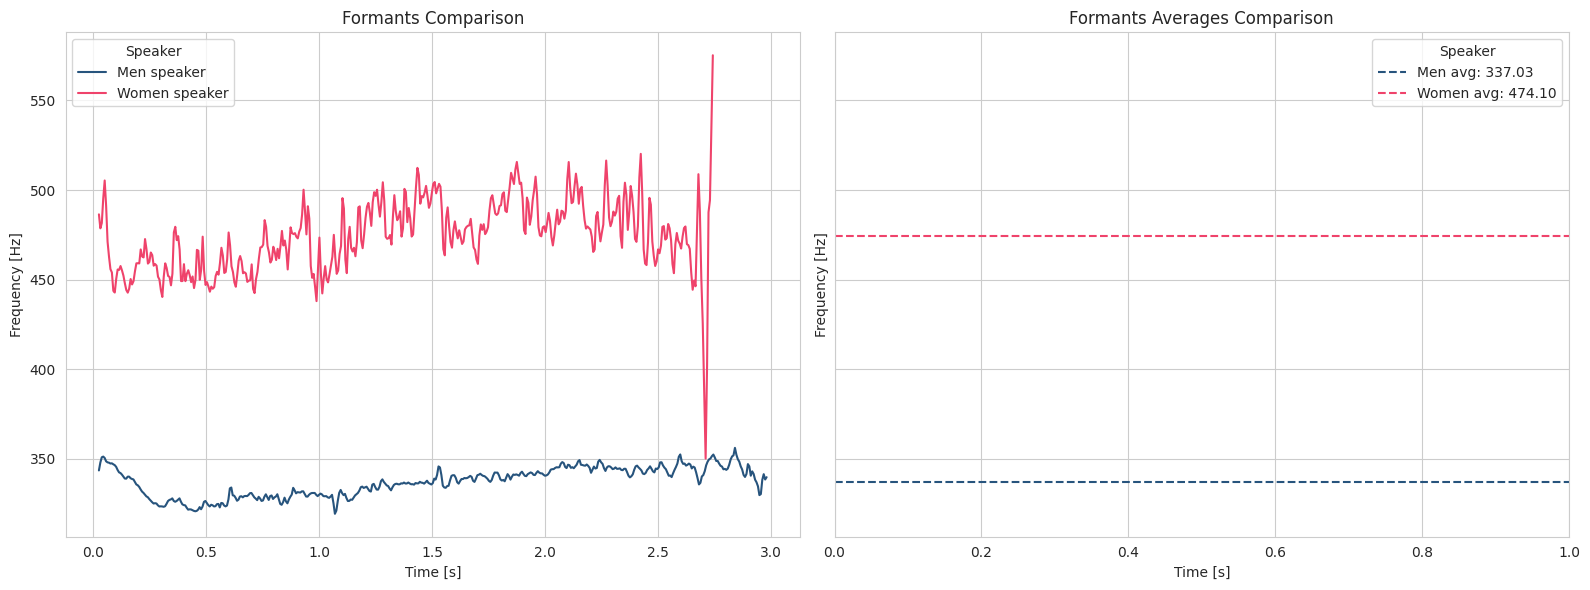

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Adding the time series
sns.lineplot(ax=axes[0], x=times_e_men, y=f1_e_men, label="Men speaker", color='#27547D')
sns.lineplot(ax=axes[0], x=times_e_women, y=f1_e_women, label="Women speaker", color='#EF436B')
axes[0].set_title("Formants Comparison")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Frequency [Hz]")
axes[0].grid(True)
axes[0].legend(title="Speaker")

# Adding the average values
axes[1].axhline(f1_e_men_avg, color='#27547D', linestyle='--', label=f'Men avg: {f1_e_men_avg:.2f}')
axes[1].axhline(f1_e_women_avg, color='#EF436B', linestyle='--', label=f'Women avg: {f1_e_women_avg:.2f}')
axes[1].set_title("Formants Averages Comparison")
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Frequency [Hz]")
axes[1].grid(True)
axes[1].legend(title="Speaker")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

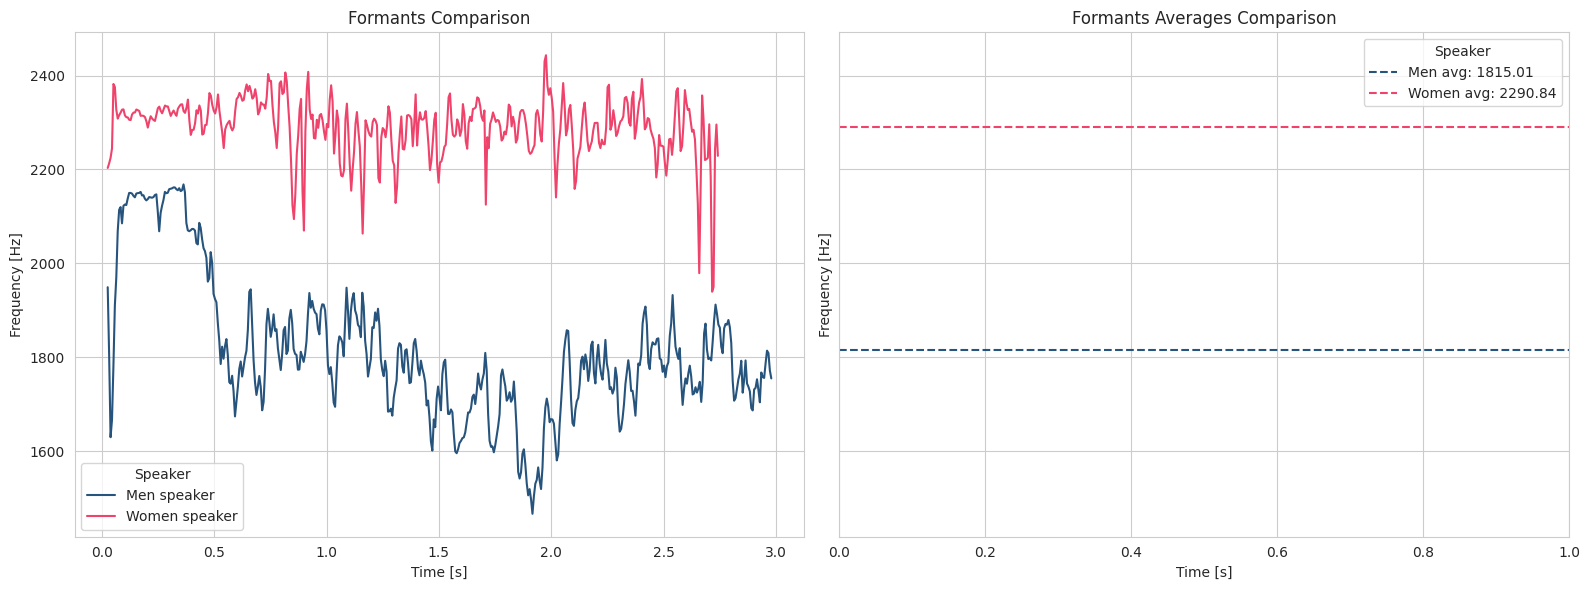

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Adding the time series
sns.lineplot(ax=axes[0], x=times_e_men, y=f2_e_men, label="Men speaker", color='#27547D')
sns.lineplot(ax=axes[0], x=times_e_women, y=f2_e_women, label="Women speaker", color='#EF436B')
axes[0].set_title("Formants Comparison")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Frequency [Hz]")
axes[0].grid(True)
axes[0].legend(title="Speaker")

# Adding the average values
axes[1].axhline(f2_e_men_avg, color='#27547D', linestyle='--', label=f'Men avg: {f2_e_men_avg:.2f}')
axes[1].axhline(f2_e_women_avg, color='#EF436B', linestyle='--', label=f'Women avg: {f2_e_women_avg:.2f}')
axes[1].set_title("Formants Averages Comparison")
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Frequency [Hz]")
axes[1].grid(True)
axes[1].legend(title="Speaker")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

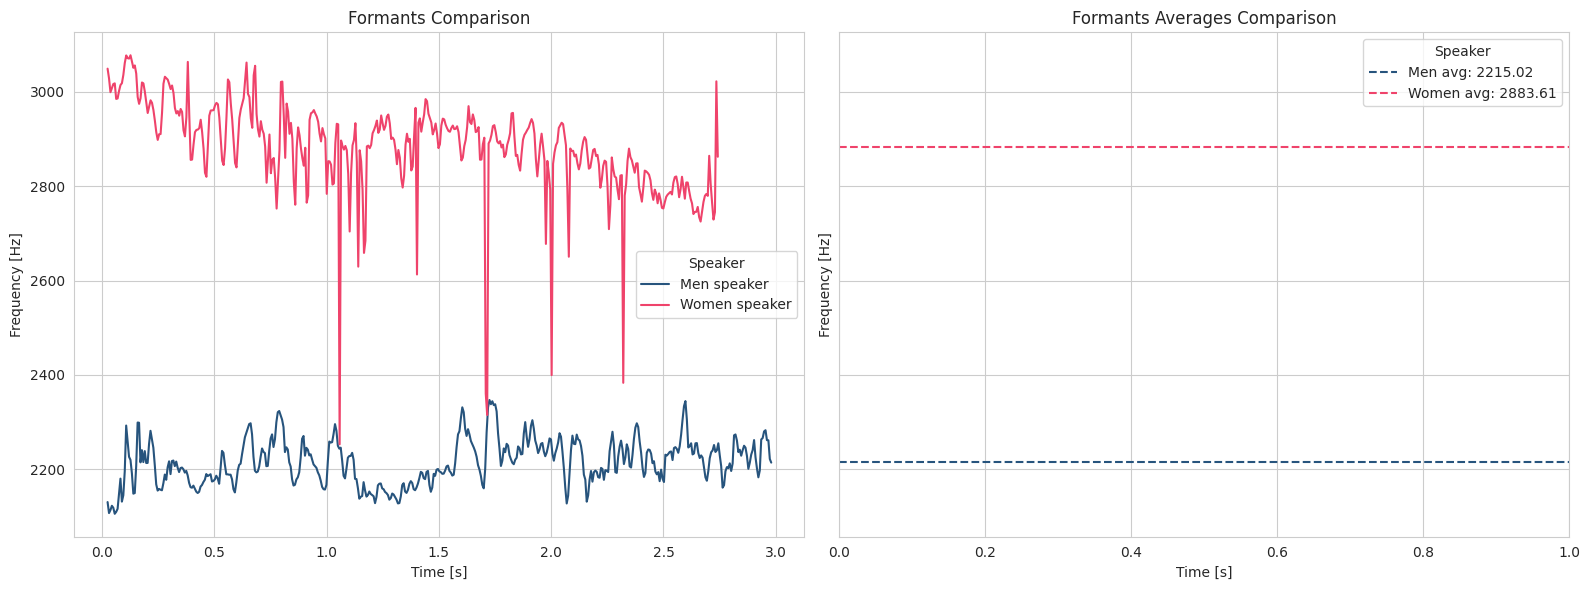

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Adding the time series
sns.lineplot(ax=axes[0], x=times_e_men, y=f3_e_men, label="Men speaker", color='#27547D')
sns.lineplot(ax=axes[0], x=times_e_women, y=f3_e_women, label="Women speaker", color='#EF436B')
axes[0].set_title("Formants Comparison")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Frequency [Hz]")
axes[0].grid(True)
axes[0].legend(title="Speaker")

# Adding the average values
axes[1].axhline(f3_e_men_avg, color='#27547D', linestyle='--', label=f'Men avg: {f3_e_men_avg:.2f}')
axes[1].axhline(f3_e_women_avg, color='#EF436B', linestyle='--', label=f'Women avg: {f3_e_women_avg:.2f}')
axes[1].set_title("Formants Averages Comparison")
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Frequency [Hz]")
axes[1].grid(True)
axes[1].legend(title="Speaker")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Vowel 'i'

In [18]:
# Load the audio file
vowel_i_men = parselmouth.Sound(get_file('Vocals', 'speaker1_i.wav'))
vowel_i_women = parselmouth.Sound(get_file('Vocals', 'speaker3_i.wav'))

Next, I visualize the waveform for both audio files. At this stage, I cannot describe any specific behavior or make inferences based on the visualization.

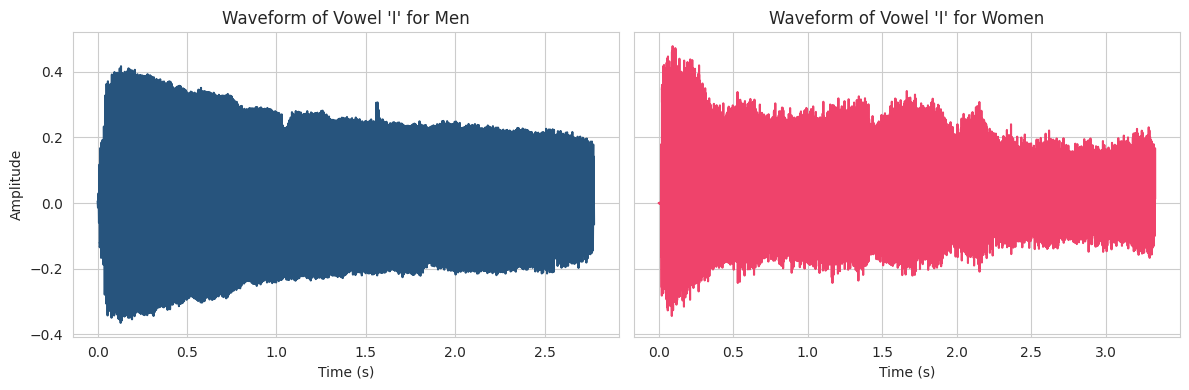

In [19]:
# Extract waveform data and plot it using seaborn
time_i_men = vowel_i_men.xs()
amplitude_i_men = vowel_i_men.values[0]

time_i_women = vowel_i_women.xs()
amplitude_i_women = vowel_i_women.values[0]

# Create a figure with two subplots in horizontal layout (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True, sharex=False)

# Plot waveform for Men on the first axis
sns.lineplot(x=time_i_men, y=amplitude_i_men, ax=ax1, color="#27547D")
ax1.set_title("Waveform of Vowel 'I' for Men")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude")

# Plot waveform for Women on the second axis
sns.lineplot(x=time_i_women, y=amplitude_i_women, ax=ax2, color="#EF436B")
ax2.set_title("Waveform of Vowel 'I' for Women")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Amplitude")

# Adjust layout
plt.tight_layout()
plt.show()

Subsequently, I extract the formant information from the waveform using the Burn algorithm.

In [20]:
# Calculate formants using the Burg algorithm
formants_men = vowel_i_men.to_formant_burg()
formants_women = vowel_i_women.to_formant_burg()

Next, I compute the first, second, and third formants for each speaker's audio file.

In [21]:
# Extract time and formants F1, F2, F3 for men
times_i_men = np.linspace(formants_men.xmin, formants_men.xmax, formants_men.nx)
f1_i_men = [formants_men.get_value_at_time(1, t) for t in times_i_men]
f2_i_men = [formants_men.get_value_at_time(2, t) for t in times_i_men]
f3_i_men = [formants_men.get_value_at_time(3, t) for t in times_i_men]

# Extract time and formants F1, F2, F3 for women
times_i_women = np.linspace(formants_women.xmin, formants_women.xmax, formants_women.nx)
f1_i_women = [formants_women.get_value_at_time(1, t) for t in times_i_women]
f2_i_women = [formants_women.get_value_at_time(2, t) for t in times_i_women]
f3_i_women = [formants_women.get_value_at_time(3, t) for t in times_i_women]

Before proceeding, I compute the mean of each formant for both speakers to compare their respective mean frequencies by gender.

In [22]:
# Extract time and formants F1, F2, F3 for men
f1_i_men_avg = np.nanmean(f1_i_men)
f2_i_men_avg = np.nanmean(f2_i_men)
f3_i_men_avg = np.nanmean(f3_i_men)

# Extract time and formants F1, F2, F3 for women
f1_i_women_avg = np.nanmean(f1_i_women)
f2_i_women_avg = np.nanmean(f2_i_women)
f3_i_women_avg = np.nanmean(f3_i_women)

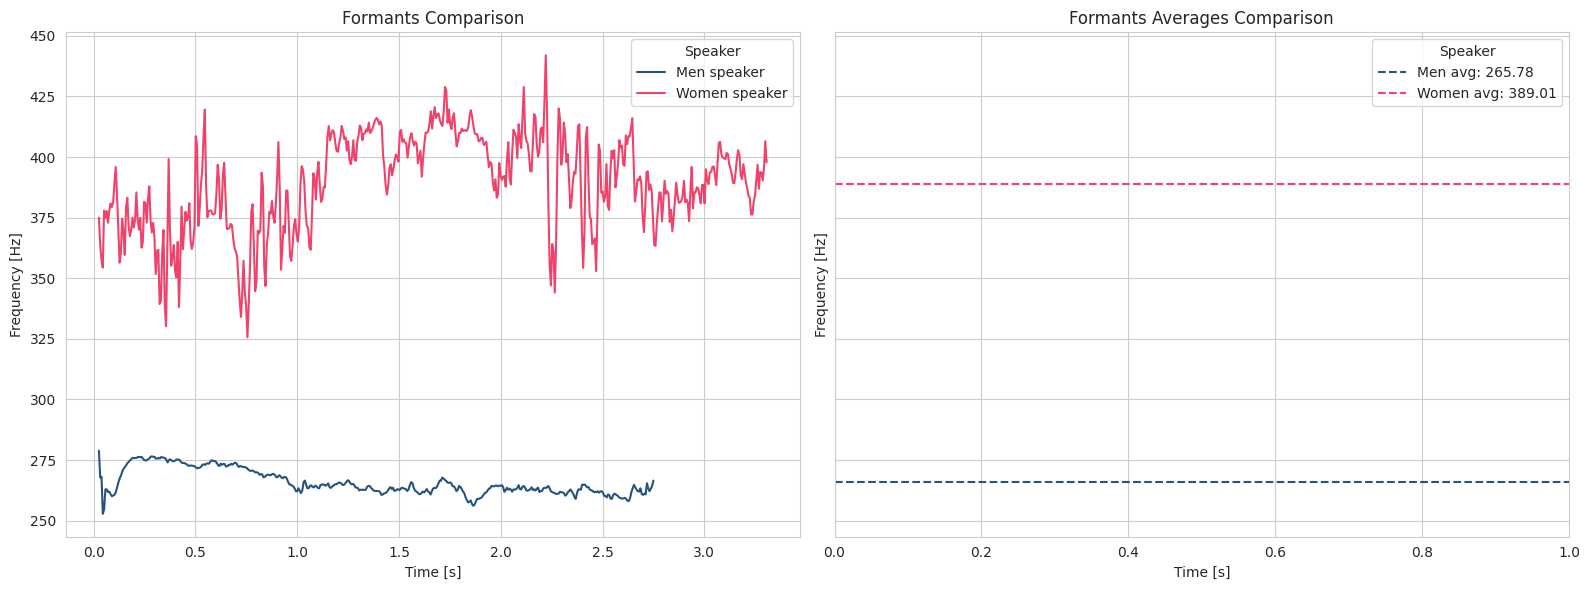

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Adding the time series
sns.lineplot(ax=axes[0], x=times_i_men, y=f1_i_men, label="Men speaker", color='#27547D')
sns.lineplot(ax=axes[0], x=times_i_women, y=f1_i_women, label="Women speaker", color='#EF436B')
axes[0].set_title("Formants Comparison")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Frequency [Hz]")
axes[0].grid(True)
axes[0].legend(title="Speaker")

# Adding the average values
axes[1].axhline(f1_i_men_avg, color='#27547D', linestyle='--', label=f'Men avg: {f1_i_men_avg:.2f}')
axes[1].axhline(f1_i_women_avg, color='#EF436B', linestyle='--', label=f'Women avg: {f1_i_women_avg:.2f}')
axes[1].set_title("Formants Averages Comparison")
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Frequency [Hz]")
axes[1].grid(True)
axes[1].legend(title="Speaker")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

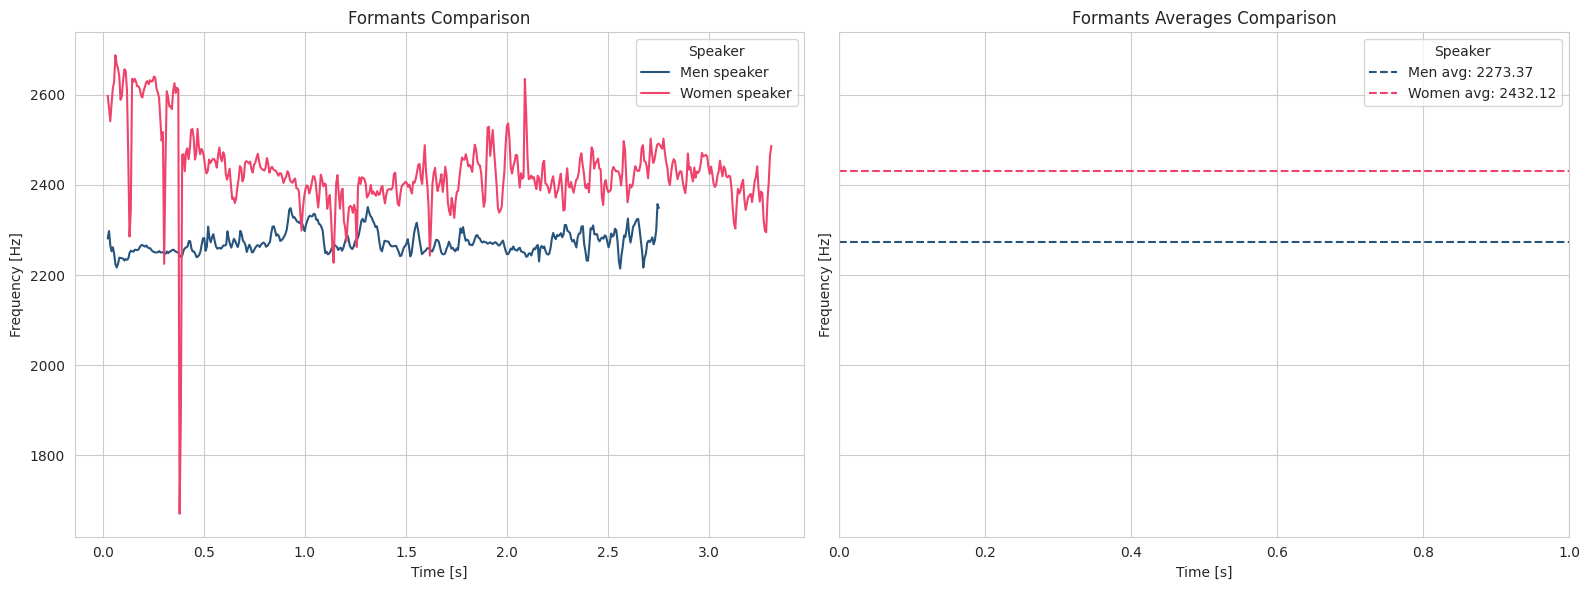

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Adding the time series
sns.lineplot(ax=axes[0], x=times_i_men, y=f2_i_men, label="Men speaker", color='#27547D')
sns.lineplot(ax=axes[0], x=times_i_women, y=f2_i_women, label="Women speaker", color='#EF436B')
axes[0].set_title("Formants Comparison")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Frequency [Hz]")
axes[0].grid(True)
axes[0].legend(title="Speaker")

# Adding the average values
axes[1].axhline(f2_i_men_avg, color='#27547D', linestyle='--', label=f'Men avg: {f2_i_men_avg:.2f}')
axes[1].axhline(f2_i_women_avg, color='#EF436B', linestyle='--', label=f'Women avg: {f2_i_women_avg:.2f}')
axes[1].set_title("Formants Averages Comparison")
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Frequency [Hz]")
axes[1].grid(True)
axes[1].legend(title="Speaker")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

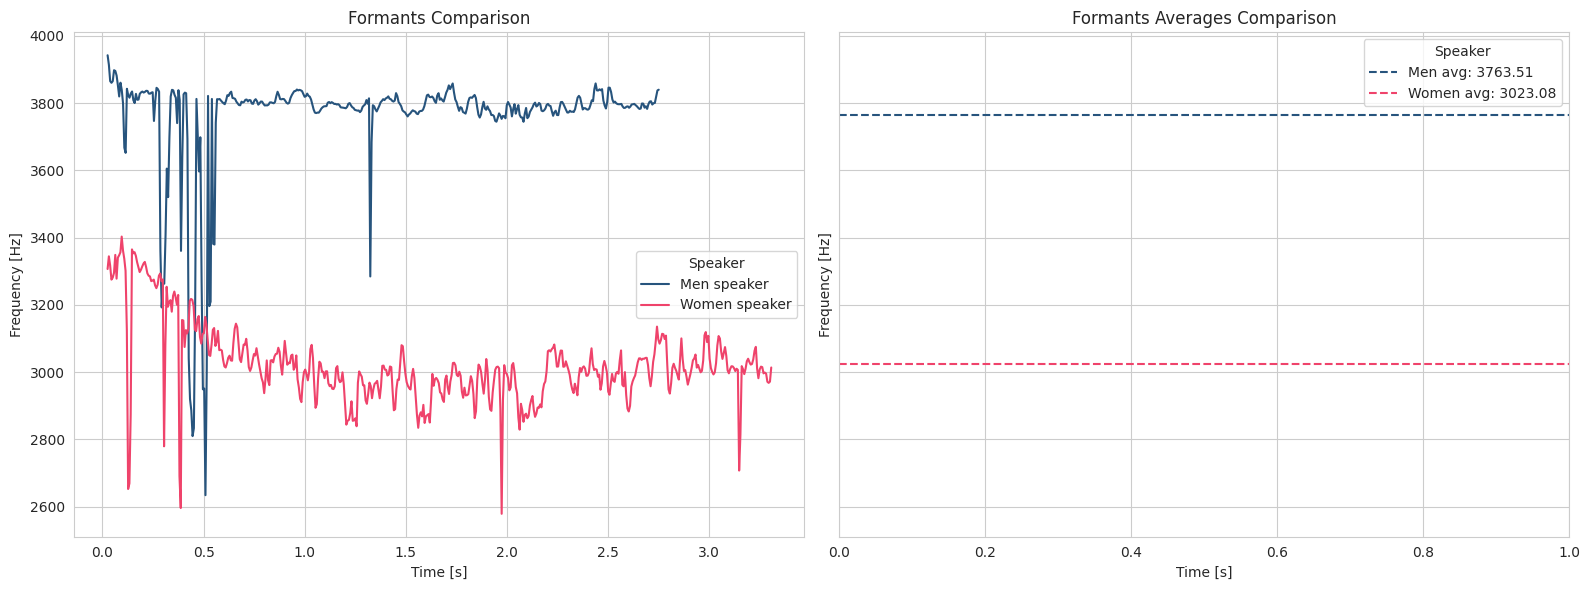

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Adding the time series
sns.lineplot(ax=axes[0], x=times_i_men, y=f3_i_men, label="Men speaker", color='#27547D')
sns.lineplot(ax=axes[0], x=times_i_women, y=f3_i_women, label="Women speaker", color='#EF436B')
axes[0].set_title("Formants Comparison")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Frequency [Hz]")
axes[0].grid(True)
axes[0].legend(title="Speaker")

# Adding the average values
axes[1].axhline(f3_i_men_avg, color='#27547D', linestyle='--', label=f'Men avg: {f3_i_men_avg:.2f}')
axes[1].axhline(f3_i_women_avg, color='#EF436B', linestyle='--', label=f'Women avg: {f3_i_women_avg:.2f}')
axes[1].set_title("Formants Averages Comparison")
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Frequency [Hz]")
axes[1].grid(True)
axes[1].legend(title="Speaker")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Vowel 'o'

In [26]:
# Load the audio file
vowel_o_men = parselmouth.Sound(get_file('Vocals', 'speaker1_o.wav'))
vowel_o_women = parselmouth.Sound(get_file('Vocals', 'speaker3_o.wav'))

Next, I visualize the waveform for both audio files. At this stage, I cannot describe any specific behavior or make inferences based on the visualization.

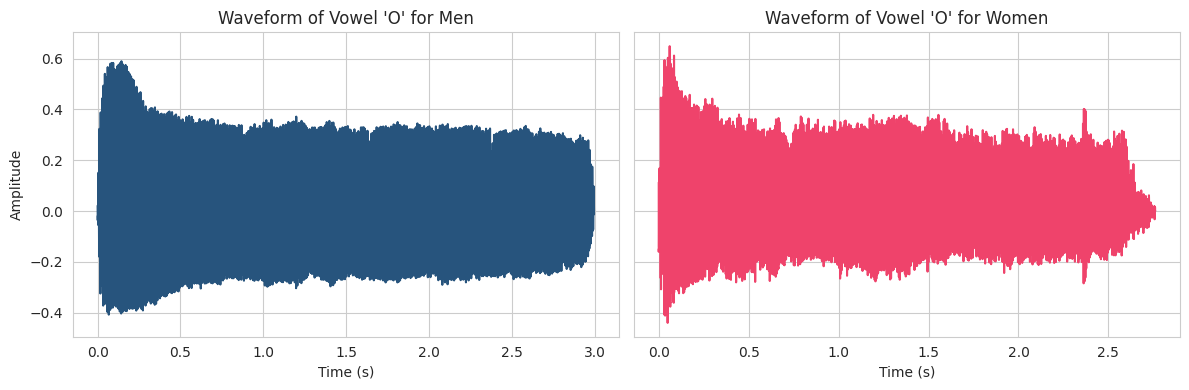

In [27]:
# Extract waveform data and plot it using seaborn
time_o_men = vowel_o_men.xs()
amplitude_o_men = vowel_o_men.values[0]

time_o_women = vowel_o_women.xs()
amplitude_o_women = vowel_o_women.values[0]

# Create a figure with two subplots in horizontal layout (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True, sharex=False)

# Plot waveform for Men on the first axis
sns.lineplot(x=time_o_men, y=amplitude_o_men, ax=ax1, color="#27547D")
ax1.set_title("Waveform of Vowel 'O' for Men")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude")

# Plot waveform for Women on the second axis
sns.lineplot(x=time_o_women, y=amplitude_o_women, ax=ax2, color="#EF436B")
ax2.set_title("Waveform of Vowel 'O' for Women")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Amplitude")

# Adjust layout
plt.tight_layout()
plt.show()

Subsequently, I extract the formant information from the waveform using the Burn algorithm.

In [28]:
# Calculate formants using the Burg algorithm
formants_men = vowel_o_men.to_formant_burg()
formants_women = vowel_o_women.to_formant_burg()

Next, I compute the first, second, and third formants for each speaker's audio file.

In [29]:
# Extract time and formants F1, F2, F3 for men
times_o_men = np.linspace(formants_men.xmin, formants_men.xmax, formants_men.nx)
f1_o_men = [formants_men.get_value_at_time(1, t) for t in times_o_men]
f2_o_men = [formants_men.get_value_at_time(2, t) for t in times_o_men]
f3_o_men = [formants_men.get_value_at_time(3, t) for t in times_o_men]

# Extract time and formants F1, F2, F3 for women
times_o_women = np.linspace(formants_women.xmin, formants_women.xmax, formants_women.nx)
f1_o_women = [formants_women.get_value_at_time(1, t) for t in times_o_women]
f2_o_women = [formants_women.get_value_at_time(2, t) for t in times_o_women]
f3_o_women = [formants_women.get_value_at_time(3, t) for t in times_o_women]

Before proceeding, I compute the mean of each formant for both speakers to compare their respective mean frequencies by gender.

In [30]:
# Extract time and formants F1, F2, F3 for men
f1_o_men_avg = np.nanmean(f1_o_men)
f2_o_men_avg = np.nanmean(f2_o_men)
f3_o_men_avg = np.nanmean(f3_o_men)

# Extract time and formants F1, F2, F3 for women
f1_o_women_avg = np.nanmean(f1_o_women)
f2_o_women_avg = np.nanmean(f2_o_women)
f3_o_women_avg = np.nanmean(f3_o_women)

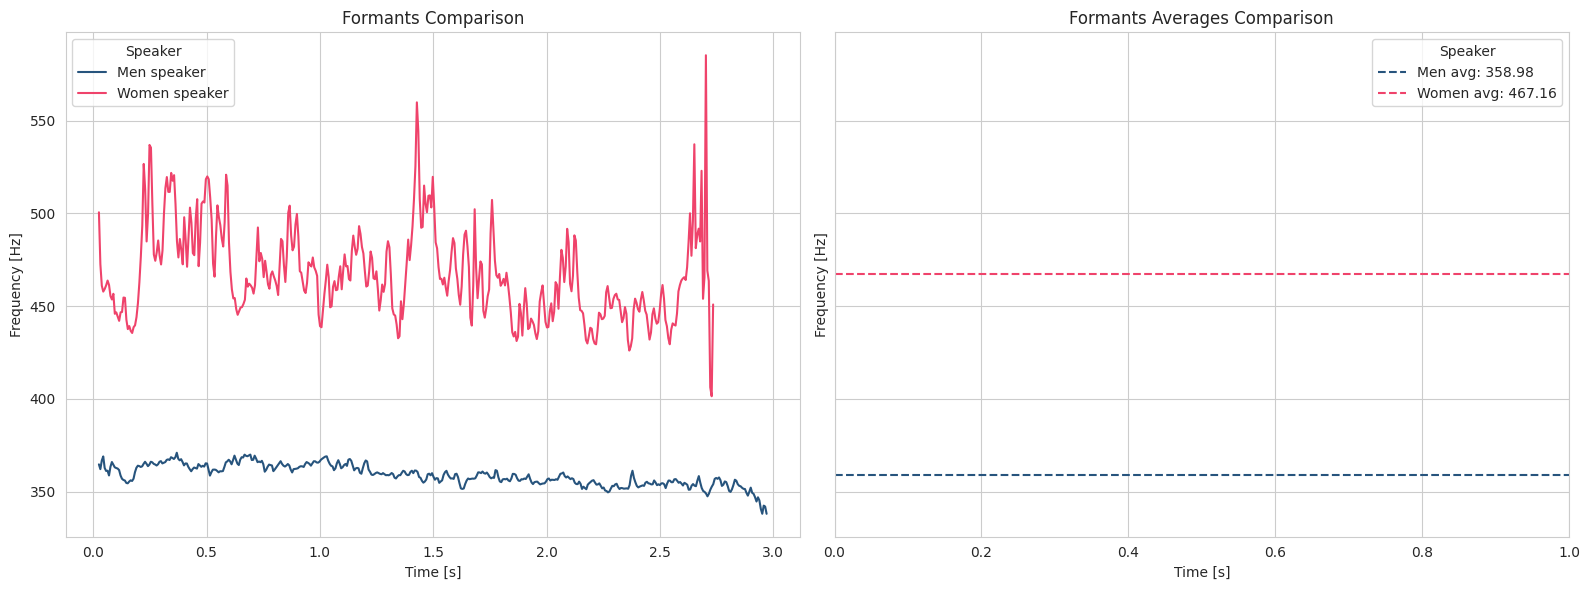

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Adding the time series for "o"
sns.lineplot(ax=axes[0], x=times_o_men, y=f1_o_men, label="Men speaker", color='#27547D')
sns.lineplot(ax=axes[0], x=times_o_women, y=f1_o_women, label="Women speaker", color='#EF436B')
axes[0].set_title("Formants Comparison")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Frequency [Hz]")
axes[0].grid(True)
axes[0].legend(title="Speaker")

# Adding the average values for "o"
axes[1].axhline(f1_o_men_avg, color='#27547D', linestyle='--', label=f'Men avg: {f1_o_men_avg:.2f}')
axes[1].axhline(f1_o_women_avg, color='#EF436B', linestyle='--', label=f'Women avg: {f1_o_women_avg:.2f}')
axes[1].set_title("Formants Averages Comparison")
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Frequency [Hz]")
axes[1].grid(True)
axes[1].legend(title="Speaker")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

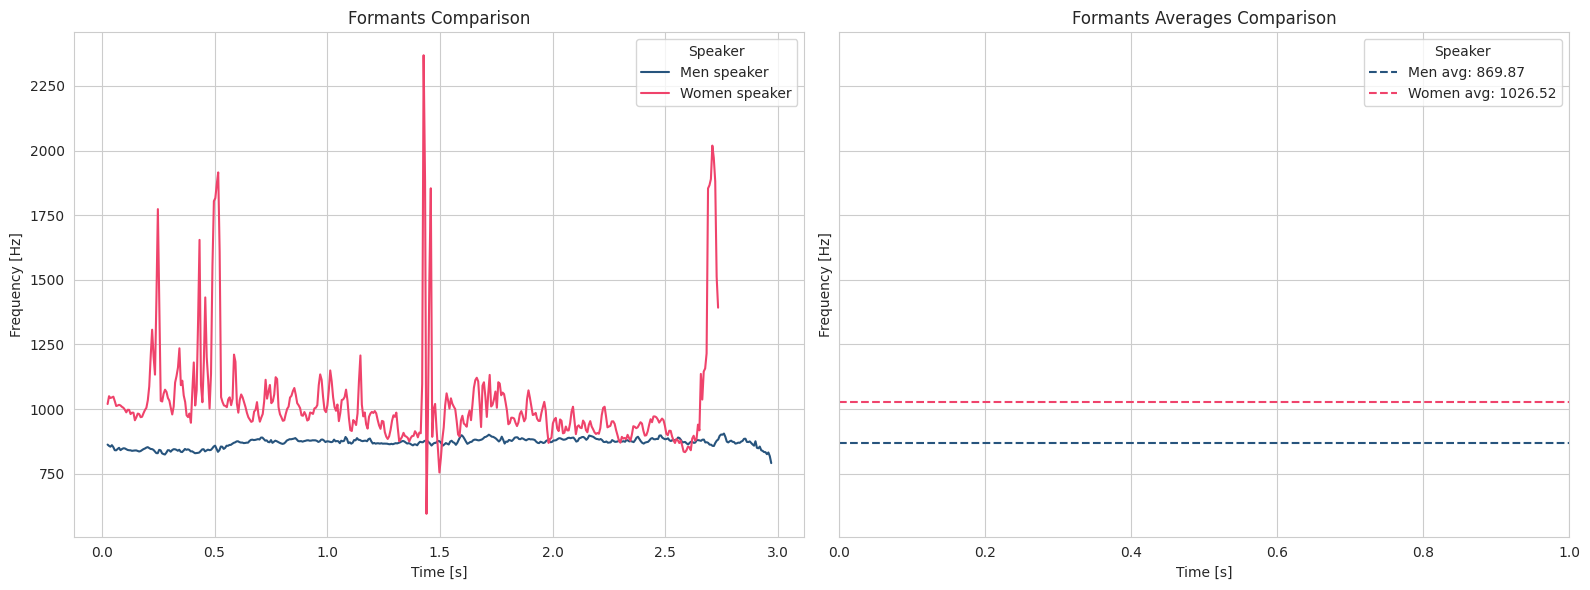

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Adding the time series for "o"
sns.lineplot(ax=axes[0], x=times_o_men, y=f2_o_men, label="Men speaker", color='#27547D')
sns.lineplot(ax=axes[0], x=times_o_women, y=f2_o_women, label="Women speaker", color='#EF436B')
axes[0].set_title("Formants Comparison")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Frequency [Hz]")
axes[0].grid(True)
axes[0].legend(title="Speaker")

# Adding the average values for "o"
axes[1].axhline(f2_o_men_avg, color='#27547D', linestyle='--', label=f'Men avg: {f2_o_men_avg:.2f}')
axes[1].axhline(f2_o_women_avg, color='#EF436B', linestyle='--', label=f'Women avg: {f2_o_women_avg:.2f}')
axes[1].set_title("Formants Averages Comparison")
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Frequency [Hz]")
axes[1].grid(True)
axes[1].legend(title="Speaker")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

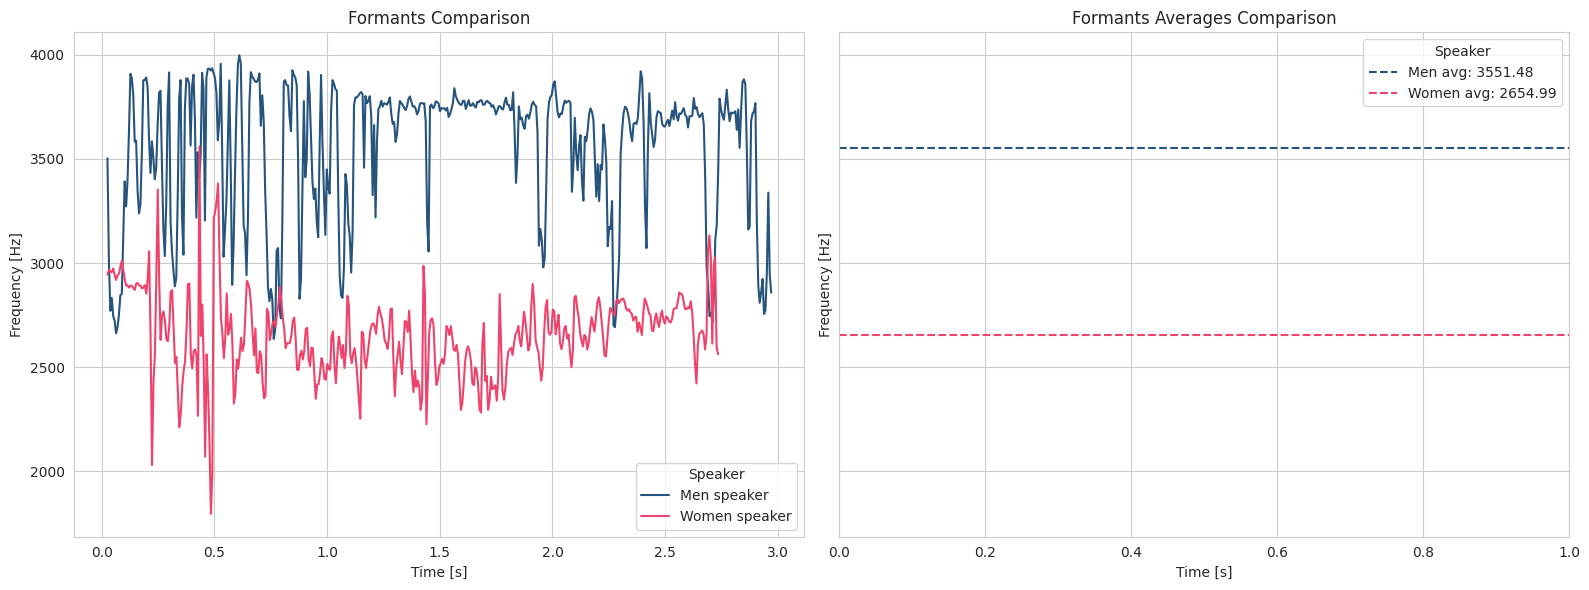

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Adding the time series for "o"
sns.lineplot(ax=axes[0], x=times_o_men, y=f3_o_men, label="Men speaker", color='#27547D')
sns.lineplot(ax=axes[0], x=times_o_women, y=f3_o_women, label="Women speaker", color='#EF436B')
axes[0].set_title("Formants Comparison")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Frequency [Hz]")
axes[0].grid(True)
axes[0].legend(title="Speaker")

# Adding the average values for "o"
axes[1].axhline(f3_o_men_avg, color='#27547D', linestyle='--', label=f'Men avg: {f3_o_men_avg:.2f}')
axes[1].axhline(f3_o_women_avg, color='#EF436B', linestyle='--', label=f'Women avg: {f3_o_women_avg:.2f}')
axes[1].set_title("Formants Averages Comparison")
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Frequency [Hz]")
axes[1].grid(True)
axes[1].legend(title="Speaker")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Vowel 'u'

In [34]:
# Load the audio file
vowel_u_men = parselmouth.Sound(get_file('Vocals', 'speaker1_u.wav'))
vowel_u_women = parselmouth.Sound(get_file('Vocals', 'speaker3_u.wav'))

Next, I visualize the waveform for both audio files. At this stage, I cannot describe any specific behavior or make inferences based on the visualization.

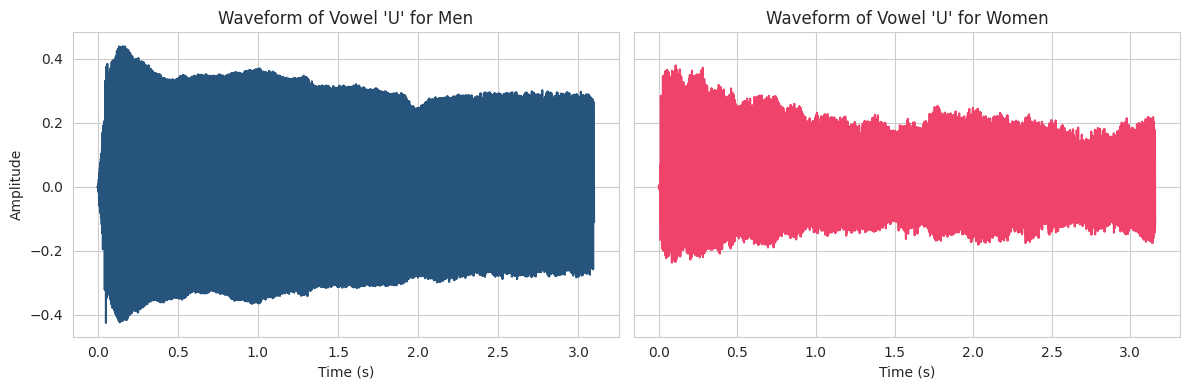

In [35]:
# Extract waveform data and plot it using seaborn
time_u_men = vowel_u_men.xs()
amplitude_u_men = vowel_u_men.values[0]

time_u_women = vowel_u_women.xs()
amplitude_u_women = vowel_u_women.values[0]

# Create a figure with two subplots in horizontal layout (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True, sharex=False)

# Plot waveform for Men on the first axis
sns.lineplot(x=time_u_men, y=amplitude_u_men, ax=ax1, color="#27547D")
ax1.set_title("Waveform of Vowel 'U' for Men")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude")

# Plot waveform for Women on the second axis
sns.lineplot(x=time_u_women, y=amplitude_u_women, ax=ax2, color="#EF436B")
ax2.set_title("Waveform of Vowel 'U' for Women")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Amplitude")

# Adjust layout
plt.tight_layout()
plt.show()

Subsequently, I extract the formant information from the waveform using the Burn algorithm.

In [36]:
# Calculate formants using the Burg algorithm
formants_men = vowel_u_men.to_formant_burg()
formants_women = vowel_u_women.to_formant_burg()

Next, I compute the first, second, and third formants for each speaker's audio file.

In [37]:
# Extract time and formants F1, F2, F3 for men
times_u_men = np.linspace(formants_men.xmin, formants_men.xmax, formants_men.nx)
f1_u_men = [formants_men.get_value_at_time(1, t) for t in times_u_men]
f2_u_men = [formants_men.get_value_at_time(2, t) for t in times_u_men]
f3_u_men = [formants_men.get_value_at_time(3, t) for t in times_u_men]

# Extract time and formants F1, F2, F3 for women
times_u_women = np.linspace(formants_women.xmin, formants_women.xmax, formants_women.nx)
f1_u_women = [formants_women.get_value_at_time(1, t) for t in times_u_women]
f2_u_women = [formants_women.get_value_at_time(2, t) for t in times_u_women]
f3_u_women = [formants_women.get_value_at_time(3, t) for t in times_u_women]

Before proceeding, I compute the mean of each formant for both speakers to compare their respective mean frequencies by gender.

In [38]:
# Extract time and formants F1, F2, F3 for men
f1_u_men_avg = np.nanmean(f1_u_men)
f2_u_men_avg = np.nanmean(f2_u_men)
f3_u_men_avg = np.nanmean(f3_u_men)

# Extract time and formants F1, F2, F3 for women
f1_u_women_avg = np.nanmean(f1_u_women)
f2_u_women_avg = np.nanmean(f2_u_women)
f3_u_women_avg = np.nanmean(f3_u_women)

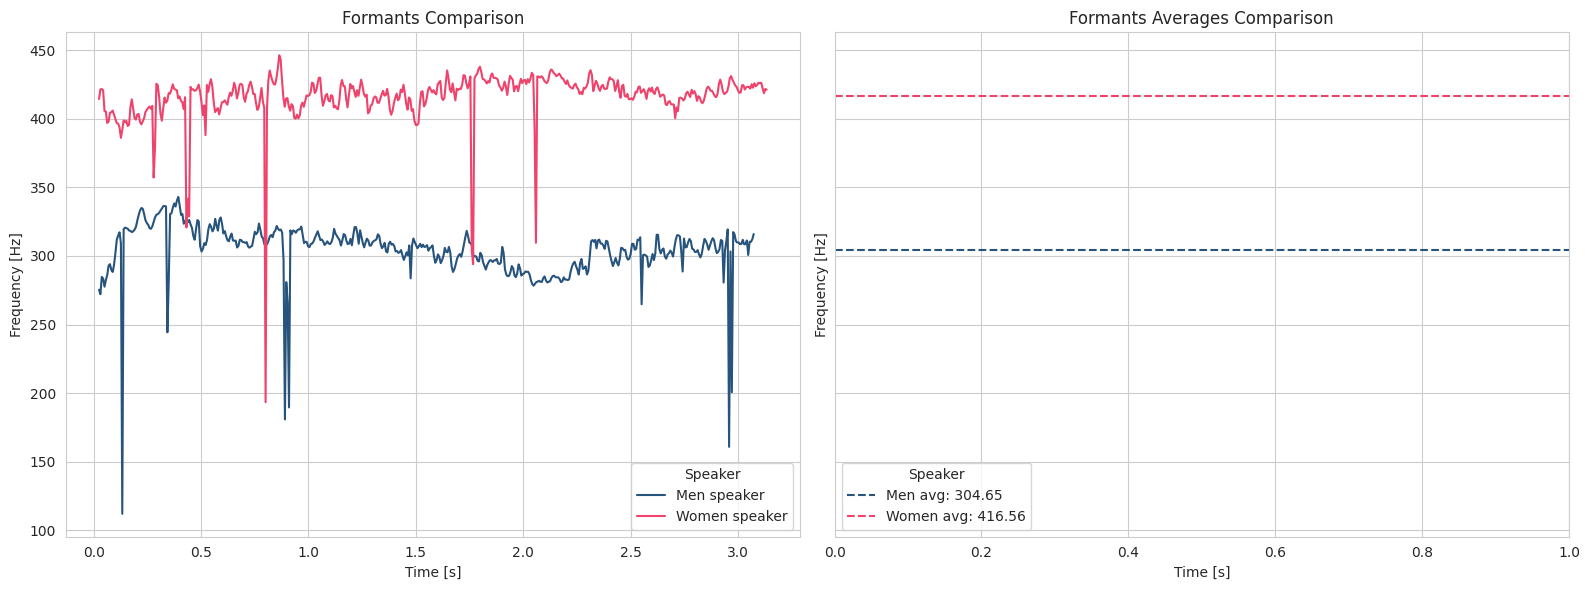

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Adding the time series for "u"
sns.lineplot(ax=axes[0], x=times_u_men, y=f1_u_men, label="Men speaker", color='#27547D')
sns.lineplot(ax=axes[0], x=times_u_women, y=f1_u_women, label="Women speaker", color='#EF436B')
axes[0].set_title("Formants Comparison")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Frequency [Hz]")
axes[0].grid(True)
axes[0].legend(title="Speaker")

# Adding the average values for "u"
axes[1].axhline(f1_u_men_avg, color='#27547D', linestyle='--', label=f'Men avg: {f1_u_men_avg:.2f}')
axes[1].axhline(f1_u_women_avg, color='#EF436B', linestyle='--', label=f'Women avg: {f1_u_women_avg:.2f}')
axes[1].set_title("Formants Averages Comparison")
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Frequency [Hz]")
axes[1].grid(True)
axes[1].legend(title="Speaker")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

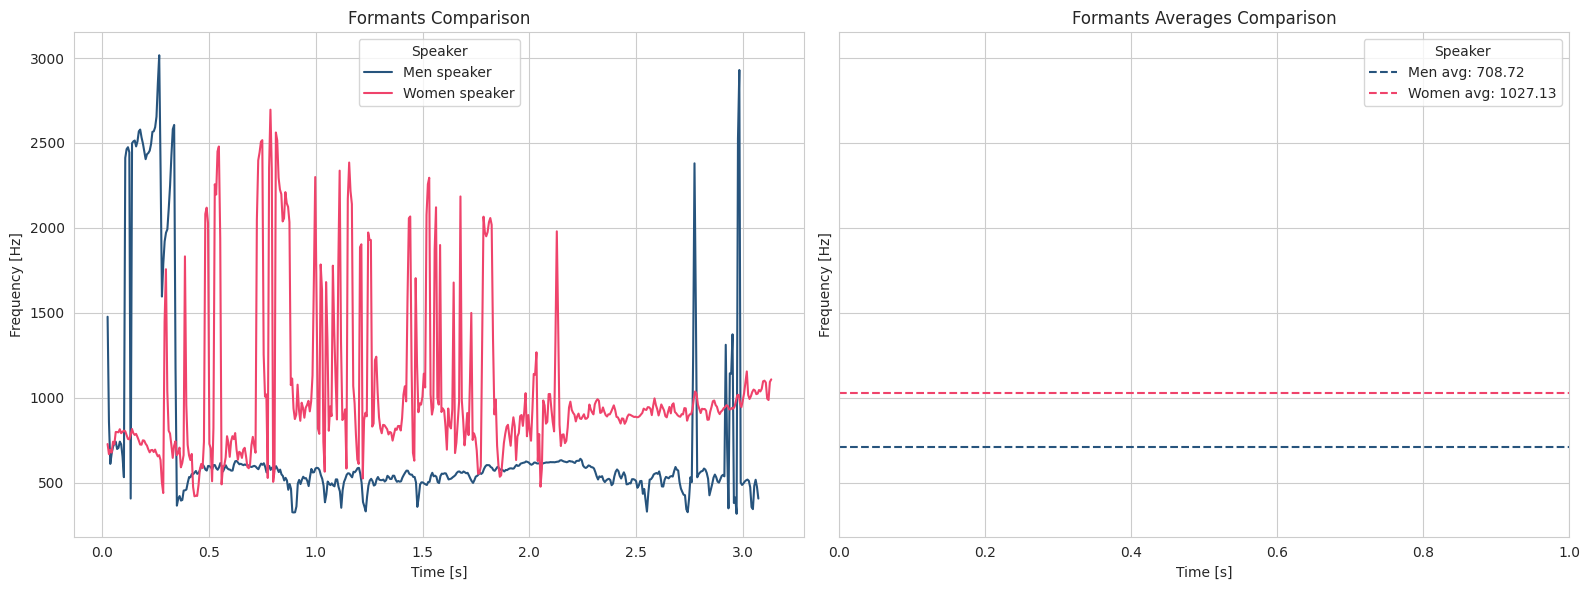

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Adding the time series for "u"
sns.lineplot(ax=axes[0], x=times_u_men, y=f2_u_men, label="Men speaker", color='#27547D')
sns.lineplot(ax=axes[0], x=times_u_women, y=f2_u_women, label="Women speaker", color='#EF436B')
axes[0].set_title("Formants Comparison")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Frequency [Hz]")
axes[0].grid(True)
axes[0].legend(title="Speaker")

# Adding the average values for "u"
axes[1].axhline(f2_u_men_avg, color='#27547D', linestyle='--', label=f'Men avg: {f2_u_men_avg:.2f}')
axes[1].axhline(f2_u_women_avg, color='#EF436B', linestyle='--', label=f'Women avg: {f2_u_women_avg:.2f}')
axes[1].set_title("Formants Averages Comparison")
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Frequency [Hz]")
axes[1].grid(True)
axes[1].legend(title="Speaker")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

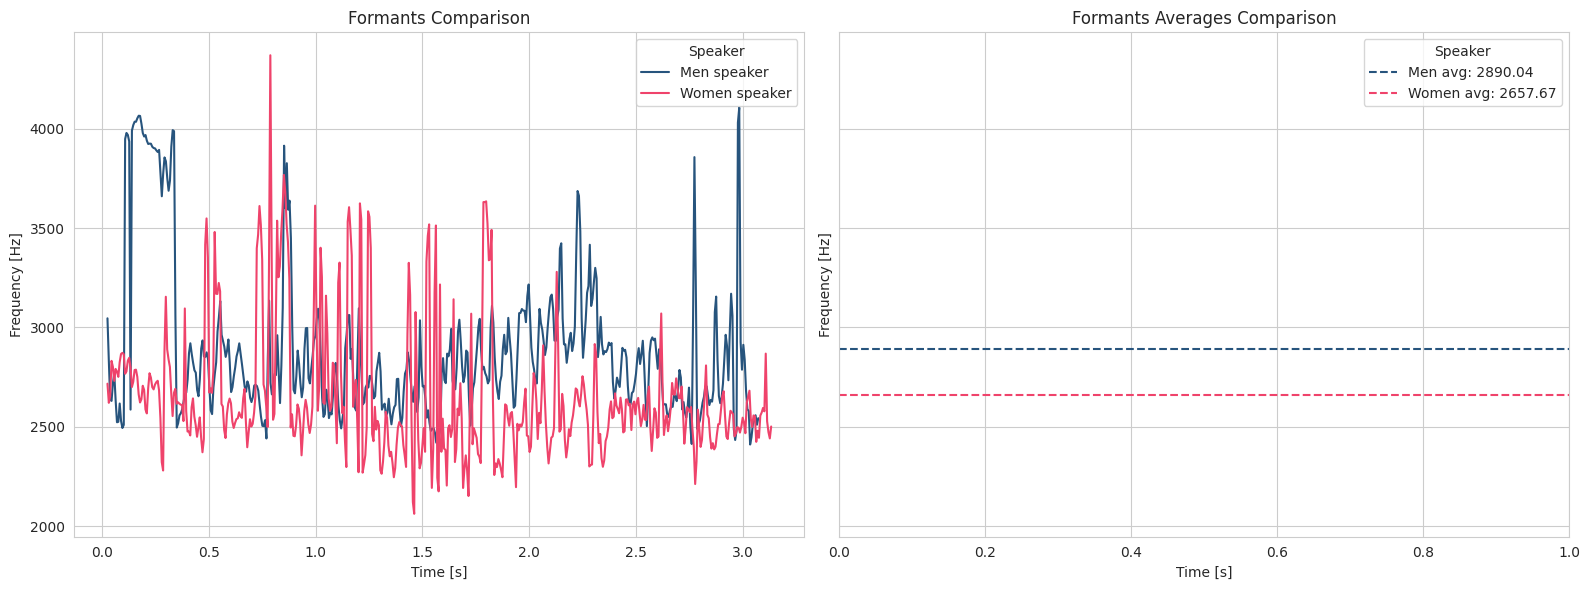

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Adding the time series for "u"
sns.lineplot(ax=axes[0], x=times_u_men, y=f3_u_men, label="Men speaker", color='#27547D')
sns.lineplot(ax=axes[0], x=times_u_women, y=f3_u_women, label="Women speaker", color='#EF436B')
axes[0].set_title("Formants Comparison")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Frequency [Hz]")
axes[0].grid(True)
axes[0].legend(title="Speaker")

# Adding the average values for "u"
axes[1].axhline(f3_u_men_avg, color='#27547D', linestyle='--', label=f'Men avg: {f3_u_men_avg:.2f}')
axes[1].axhline(f3_u_women_avg, color='#EF436B', linestyle='--', label=f'Women avg: {f3_u_women_avg:.2f}')
axes[1].set_title("Formants Averages Comparison")
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Frequency [Hz]")
axes[1].grid(True)
axes[1].legend(title="Speaker")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Compare average formant frequency per gender

### First Formant

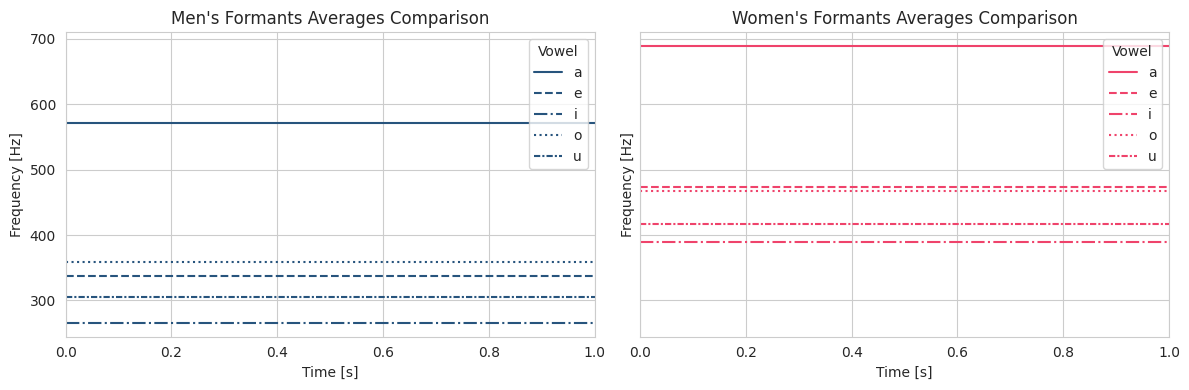

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=False, sharey=True)

# Adding the average values for men
ax1.axhline(f1_a_men_avg, color='#27547D', linestyle='-', label='a')
ax1.axhline(f1_e_men_avg, color='#27547D', linestyle='--', label='e')
ax1.axhline(f1_i_men_avg, color='#27547D', linestyle='-.', label='i')
ax1.axhline(f1_o_men_avg, color='#27547D', linestyle=':', label='o')
ax1.axhline(f1_u_men_avg, color='#27547D', linestyle=(0, (3, 1, 1, 1)), label='u')  # Dash-dot-dash
ax1.set_title("Men's Formants Averages Comparison")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Frequency [Hz]")
ax1.grid(True)
ax1.legend(title="Vowel")

# Adding the average values for women
ax2.axhline(f1_a_women_avg, color='#EF436B', linestyle='-', label='a')
ax2.axhline(f1_e_women_avg, color='#EF436B', linestyle='--', label='e')
ax2.axhline(f1_i_women_avg, color='#EF436B', linestyle='-.', label='i')
ax2.axhline(f1_o_women_avg, color='#EF436B', linestyle=':', label='o')
ax2.axhline(f1_u_women_avg, color='#EF436B', linestyle=(0, (3, 1, 1, 1)), label='u')  # Dash-dot-dash
ax2.set_title("Women's Formants Averages Comparison")
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Frequency [Hz]")
ax2.grid(True)
ax2.legend(title="Vowel")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Second Formant

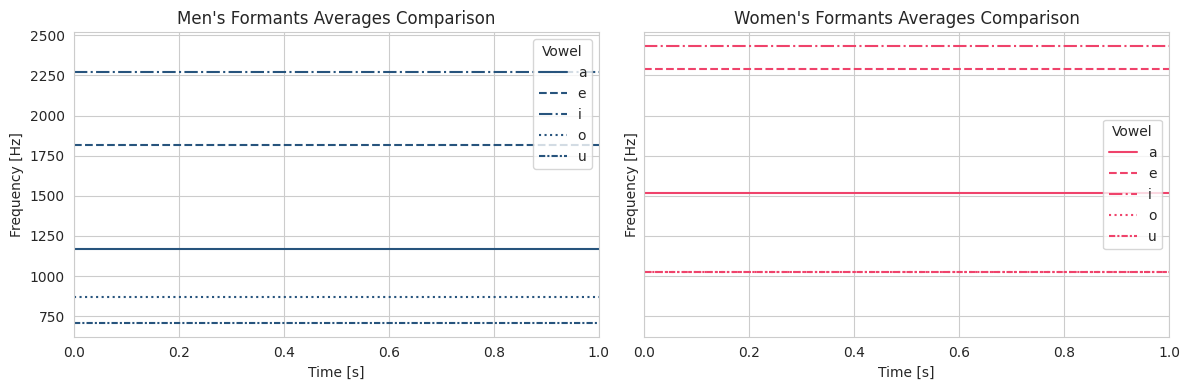

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=False, sharey=True)

# Adding the average values for men
ax1.axhline(f2_a_men_avg, color='#27547D', linestyle='-', label='a')
ax1.axhline(f2_e_men_avg, color='#27547D', linestyle='--', label='e')
ax1.axhline(f2_i_men_avg, color='#27547D', linestyle='-.', label='i')
ax1.axhline(f2_o_men_avg, color='#27547D', linestyle=':', label='o')
ax1.axhline(f2_u_men_avg, color='#27547D', linestyle=(0, (3, 1, 1, 1)), label='u')  # Dash-dot-dash
ax1.set_title("Men's Formants Averages Comparison")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Frequency [Hz]")
ax1.grid(True)
ax1.legend(title="Vowel")

# Adding the average values for women
ax2.axhline(f2_a_women_avg, color='#EF436B', linestyle='-', label='a')
ax2.axhline(f2_e_women_avg, color='#EF436B', linestyle='--', label='e')
ax2.axhline(f2_i_women_avg, color='#EF436B', linestyle='-.', label='i')
ax2.axhline(f2_o_women_avg, color='#EF436B', linestyle=':', label='o')
ax2.axhline(f2_u_women_avg, color='#EF436B', linestyle=(0, (3, 1, 1, 1)), label='u')  # Dash-dot-dash
ax2.set_title("Women's Formants Averages Comparison")
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Frequency [Hz]")
ax2.grid(True)
ax2.legend(title="Vowel")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Third Formant

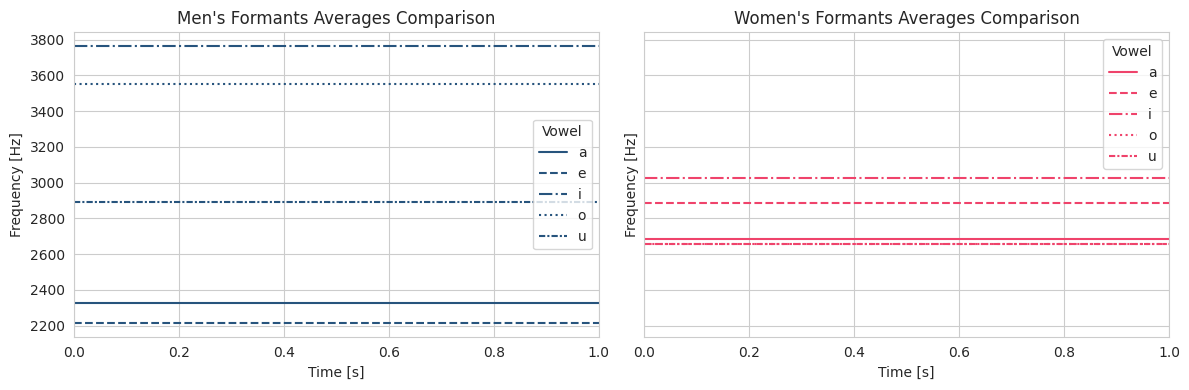

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=False, sharey=True)

# Adding the average values for men
ax1.axhline(f3_a_men_avg, color='#27547D', linestyle='-', label='a')
ax1.axhline(f3_e_men_avg, color='#27547D', linestyle='--', label='e')
ax1.axhline(f3_i_men_avg, color='#27547D', linestyle='-.', label='i')
ax1.axhline(f3_o_men_avg, color='#27547D', linestyle=':', label='o')
ax1.axhline(f3_u_men_avg, color='#27547D', linestyle=(0, (3, 1, 1, 1)), label='u')  # Dash-dot-dash
ax1.set_title("Men's Formants Averages Comparison")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Frequency [Hz]")
ax1.grid(True)
ax1.legend(title="Vowel")

# Adding the average values for women
ax2.axhline(f3_a_women_avg, color='#EF436B', linestyle='-', label='a')
ax2.axhline(f3_e_women_avg, color='#EF436B', linestyle='--', label='e')
ax2.axhline(f3_i_women_avg, color='#EF436B', linestyle='-.', label='i')
ax2.axhline(f3_o_women_avg, color='#EF436B', linestyle=':', label='o')
ax2.axhline(f3_u_women_avg, color='#EF436B', linestyle=(0, (3, 1, 1, 1)), label='u')  # Dash-dot-dash
ax2.set_title("Women's Formants Averages Comparison")
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Frequency [Hz]")
ax2.grid(True)
ax2.legend(title="Vowel")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()